<a href="https://colab.research.google.com/github/RobJavVar/Vargas_DSPN_S25/blob/master/ExerciseSubmissions/e4_techniques_for_data_cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Data cleansing

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data.

In [10]:
# Set working directory
setwd("Homework datasets/lexDat")

# Load the data
data <- read.csv("LexicalData_toclean.csv")

# Look at first few rows
head(data)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. Data Cleansing (4 points)

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive.

Write code that will copy the data to a new variable and make the above changes.

In [11]:
# Load required library
#library(tidyverse) # tidyverse was incompatible with R version available on cluster.
library(dplyr)
library(magrittr)

# Create cleaned version of data
data_clean <- data %>%
  # Remove commas and convert to numeric
  mutate(D_RT = as.numeric(gsub(",", "", D_RT))) %>%
  # Remove rows with missing RTs
  filter(!is.na(D_RT)) %>%
  # Keep only positive RTs
  filter(D_RT > 0)

# View summary to check cleaning
summary(data_clean)

     Sub_ID          Trial            Type        D_RT       
 Min.   :  1.0   Min.   :  1.0   Min.   :1   Min.   :   3.0  
 1st Qu.: 77.0   1st Qu.:124.0   1st Qu.:1   1st Qu.: 579.0  
 Median :152.0   Median :251.0   Median :1   Median : 699.0  
 Mean   :151.5   Mean   :249.5   Mean   :1   Mean   : 807.3  
 3rd Qu.:227.0   3rd Qu.:375.0   3rd Qu.:1   3rd Qu.: 907.0  
 Max.   :300.0   Max.   :500.0   Max.   :1   Max.   :3994.0  
    D_Word            Outlier             D_Zscore       
 Length:62607       Length:62607       Min.   :-3.03200  
 Class :character   Class :character   1st Qu.:-0.65300  
 Mode  :character   Mode  :character   Median :-0.24000  
                                       Mean   : 0.03338  
                                       3rd Qu.: 0.41600  
                                       Max.   :11.56200  

For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing.

> *Write your response here.*
> * First action: schema inconsistency
> * Second action: missing values
> * Third action: implausible values

---
## 3. Data Manipulation with Tidyverse (4 points)

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells.

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [20]:
# Summary statistics
data_clean %>%
  summarise(
    n_observations = n(),
    mean_rt = mean(D_RT),
    sd_rt = sd(D_RT)
  )

n_observations,mean_rt,sd_rt
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one.

In [21]:
# Create new trial variable starting at 0
data_clean <- data_clean %>%
  mutate(Trial_0 = Trial - 1)

---
## 4. Plotting Data (1 point)

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

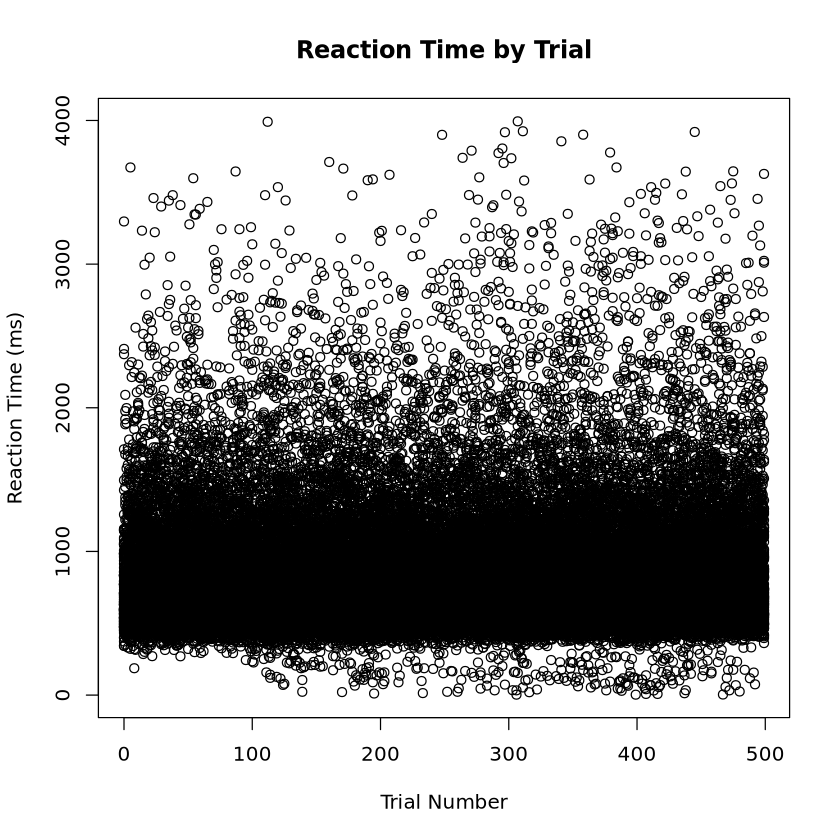

In [22]:
# Part 4 - Plot
plot(data_clean_with_trial0$Trial_0, data_clean_with_trial0$D_RT,
     xlab = "Trial Number", 
     ylab = "Reaction Time (ms)",
     main = "Reaction Time by Trial")

That's all for this assignment! When you are finished, save the notebook as Exercise4.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 10, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*